### <Center> All working code is in this jupyter notebook, with explanations from report. </center>

##  <center>  Airbnb | London </center>  

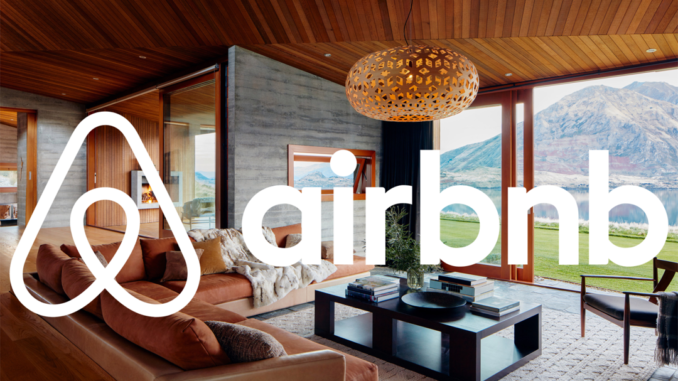

 
## Data Analysis and Visualisations
In 2008 Brian Chesky, Nathan Blecharczyk, and Joe Gebbia founded a company named "Airbnb" in San Francisco. Since then, it has become an extremely popular option for travel accommodation. Airbnb is a service, an alternative to the hotel, that allows property owners to rent their places for period of time to travellers, who search for affordable and authentic place to stay in the city. 

This work mainly focuses on exploratory data analysis of the Airbnb market in London, UK. Additionally it dives into the comparison of most popular travel destinations: New York, London and Paris. The motivation behind the project is to explore the travel accommodation market, understand the reletionships between different airbnbs and discover it's benefits, such as pricing patterns, availability, and user ratings. We aim to gain insights into customer tastes and behaviour by analysing the data, as well as find possible chances for development and progress within the Airbnb market.

## <u>Step 1:</u> Dataset information

This dataset has around 69351 observation in it with 18 columns and it is a mix between categorical and numeric values. Numerical values: 5 columns contain floats and 8 columns contain integers, together they make 14 numerical columns. Categorical values: 5 columns contain object types, meaning strings (text values). 

It consist of such columns:
* **id** *(datatype: int)*: unique identifier of the Airbnb listing
* **name** *(datatype: object)*: name of the Airbnb listing
* **host_id** *(datatype: int)*: unique identifier of the host of the listing (owner of the renting property)
* **host_name** *(datatype: object)*: name of the host
* **neighbourhood_group**: this column is used to group listings by larger geographic areas within London, such as boroughs or districts. For example, the values in this column might include 'Bexley', 'Croydon', 'Camden', 'Islington', etc.
* **neighbourhood** *(datatype: object)*: name of the neighbourhood in which the listing is located
* **latitude** *(datatype: float)*: latitude of the listing, provides information about the geographic location of each Airbnb listing in London. Latitude is one of the two coordinates used in geographic coordinate systems that measures a location's distance north or south of the equator. Hosts may have provided this information when creating their listings, and it may be used to visualise the distribution of listings around the city or to map the location of individual listings.
* **longitude** *(datatype: float)*: longitude of the listing, both longitude and latitude columns provide information about the geographic location of each Airbnb listing in London.Longitude is one of two coordinates used in geographic coordinate systems (the other being latitude). It measures a location's distance east or west of the Prime Meridian.
* **room_type** *(datatype: object)*: type of room available for booking (e.g., Entire home/apt, Private room, Shared room), where guests will either have the entire home or flat to themselves, a private room in a shared home or flat, or will share a room with others. This information can help guests decide what sort of housing they want to book, and it can also help hosts pinpoint the type of accommodation they may have available to possible guests. This column can also be used to organise entries based on the type of room available, which can be beneficial for analysis or visualisation.
* **price** *(datatype: int)*: nightly price of the listing 
* **minimum_nights** *(datatype: int)*: minimum number of nights that can be booked for the listing
* **number_of_reviews** *(datatype: int)*: total number of reviews received for the listing
* **last_review** *(datatype: object)*: date of the most recent review received for the listing
* **reviews_per_month** *(datatype: float)*: average number of reviews that the listing receives each month.This column is calculated by dividing the total number of reviews for the listing by the number of months it has been open for booking. The reviews_per_month column is a significant component of the dataset since it shows how popular each Airbnb listing is. Listings with a large number of reviews each month are more likely to be popular and may suggest a better degree of satisfaction among visitors. This column may also be used to compare the distribution of reviews across different neighbourhoods or categories of postings.
* **calculated_host_listings_count** *(datatype: int)*: this column refers to the total count of listings that a host has on Airbnb, including those that may have been deleted or are no longer available for booking. This value is calculated based on the total number of listings created by the host, providing an overview of their overall presence on the platform.
* **availability_365** *(datatype: int)*: Number of days in the next 365 days that the listing is available for booking. A higher value in the 'availability_365' column means that the listing is available for booking for more days throughout the year, whereas a lower value may suggest that the listing is booked more frequently or has limited availability. This information can be valuable for guests who want to book a listing for specific dates and for hosts who want to manage their availability and pricing strategies effectively.
* **number_of_reviews_ltm** *(datatype: int)*:  the total number of reviews that the listing has received in the last 12 months (i.e., the "last twelve months" or "LTM"). The 'number_of_reviews_ltm' column gives insights into the recent popularity and quality of each listing. If the value is higher, it means that the listing has received more reviews in the past year, which could suggest that it's popular and in high demand. This information is helpful for guests who are looking for listings with recent positive reviews and for hosts who want to manage the quality and popularity of their listings effectively.
* **license** *(datatype: float)*: the license or registration number of the listing, it indicatesthat the host has obtained any necessary licenses or registrations required by local regulations or laws in order to operate an Airbnb rental property. 



In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import plotly.express as px 


In [95]:
london_airbnb = pd.read_csv('london data.csv')

In [96]:
london_airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,106332,"Lovely large room, Bethnal Green",264345,Susie,NaN,Tower Hamlets,51.52874,-0.05396,Private room,55,3,65,2016-06-10,0.47,1,74,0,NaN
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,50,1,30,2022-07-15,0.20,2,343,9,NaN
2,284532,COSY STUDIO-FLAT WITH A GREAT VIEW,1481412,Luca,NaN,Tower Hamlets,51.52851,-0.07426,Entire home/apt,90,5,42,2022-01-04,0.34,1,222,1,NaN
3,107048,A Luxury Studio Suite in Clerkenwell,259088,Simon,NaN,Islington,51.52478,-0.10484,Private room,180,4,493,2022-09-02,3.59,5,236,20,NaN
4,284603,Notting Hill church stay in Heaven!,1481851,Tania,NaN,Kensington and Chelsea,51.51464,-0.20004,Entire home/apt,297,14,6,2022-07-04,0.05,1,180,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69346,9671724,"Cozy room in Greenwich, river view",49977905,Kurt,NaN,Greenwich,51.48300,-0.01346,Private room,55,5,67,2021-10-03,0.84,3,0,1,NaN
69347,20277958,River view Tate Modern,1132775,Mark,NaN,Southwark,51.50914,-0.10192,Entire home/apt,201,3,61,2022-09-09,0.99,1,0,12,NaN
69348,20512703,"Luxury 4 bed house, 100m to river and palace",1706966,Asher & Aileen,NaN,Richmond upon Thames,51.40571,-0.35325,Entire home/apt,246,3,6,2022-08-31,1.49,1,4,6,NaN
69349,49698549,Waterfront Hampton Stay,34213667,Alan,NaN,Richmond upon Thames,51.41029,-0.35975,Entire home/apt,250,3,9,2022-07-18,0.61,1,2,4,NaN


## <u>Step 2:</u> Data Exploration

These 18 columns give a wealth of information for deep data analysis on this dataset. We are already seeing some missing data, which will need cleaning and dealing with NaN values. We may need to continue mapping specific data to ones and zeros later on for predictive analytics.

In [97]:
london_airbnb.count()

id                                69351
name                              69330
host_id                           69351
host_name                         69346
neighbourhood_group                   0
neighbourhood                     69351
latitude                          69351
longitude                         69351
room_type                         69351
price                             69351
minimum_nights                    69351
number_of_reviews                 69351
last_review                       52571
reviews_per_month                 52571
calculated_host_listings_count    69351
availability_365                  69351
number_of_reviews_ltm             69351
license                               0
dtype: int64

In [98]:
london_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69351 entries, 0 to 69350
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              69351 non-null  int64  
 1   name                            69330 non-null  object 
 2   host_id                         69351 non-null  int64  
 3   host_name                       69346 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   69351 non-null  object 
 6   latitude                        69351 non-null  float64
 7   longitude                       69351 non-null  float64
 8   room_type                       69351 non-null  object 
 9   price                           69351 non-null  int64  
 10  minimum_nights                  69351 non-null  int64  
 11  number_of_reviews               69351 non-null  int64  
 12  last_review                     

In [99]:
len(london_airbnb)

69351

In [100]:
#checking what are the variables here:
london_airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [101]:
print('\nRows : ',london_airbnb.shape[0])
print('\nColumns :', london_airbnb.shape[1])
print('\nColumns:',london_airbnb.columns.to_list())
print(' \nUnique:\n',london_airbnb.nunique())


Rows :  69351

Columns : 18

Columns: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license']
 
Unique:
 id                                69351
name                              67029
host_id                           45229
host_name                         13043
neighbourhood_group                   0
neighbourhood                        33
latitude                          28647
longitude                         38106
room_type                             4
price                              1414
minimum_nights                      124
number_of_reviews                   434
last_review                        2728
reviews_per_month                   841
calculated_host_listings_count       77
availability_365                    366
number_of_reviews_l

Let's check the situation with outliers by visualising box plots. 
<p>Box plots may be used to visually detect outliers in a dataset. Outliers are data points that differ considerably from the norm. Outliers are often displayed in a box plot as individual data points that fall outside the whiskers that extend from the box. Outliers are points that are beyond the whiskers and can give useful information regarding the presence of uncommon observations in the dataset. 

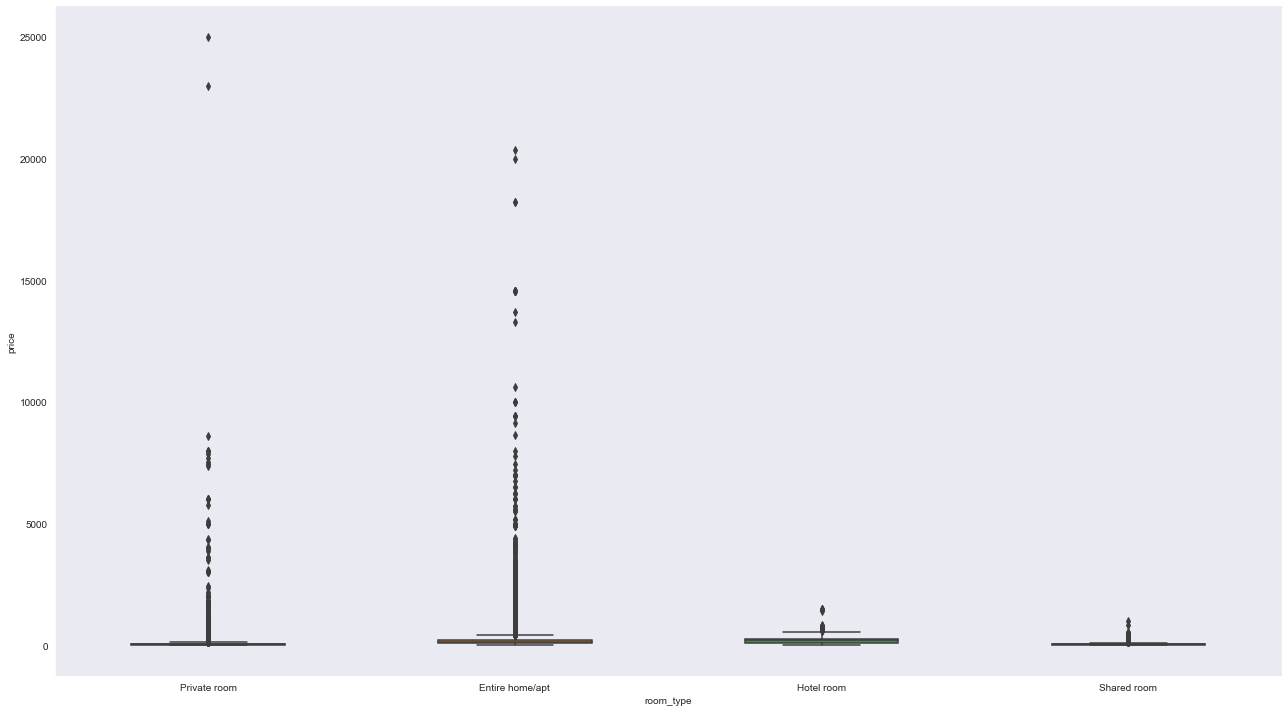

In [102]:
sns.catplot(
    data=london_airbnb, 
    x='room_type', y='price', kind='box',
    height=10, aspect=1.8, width=0.5
)

Here we can see that both Private room and Entire home have a bunch of outliers. 

In [103]:
#checking is each airbnb listing is unique one
london_airbnb['id'].nunique()

69351

In [104]:
london_airbnb[london_airbnb['host_name']=='Tania'] 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
4,284603,Notting Hill church stay in Heaven!,1481851,Tania,NaN,Kensington and Chelsea,51.514640,-0.200040,Entire home/apt,297,14,6,2022-07-04,0.05,1,180,2,NaN
33,143478,"Large room, London Fields, Hackney",696065,Tania,NaN,Hackney,51.540170,-0.054570,Private room,35,1,24,2022-02-18,0.26,7,0,1,NaN
1389,1368225,"Smart 1 bed flat Islington, London",7349092,Tania,NaN,Islington,51.549100,-0.107510,Entire home/apt,92,3,86,2022-08-15,0.79,1,0,5,NaN
2722,3510729,"Tower Bridge Haven, SE1",10279513,Tania,NaN,Southwark,51.498770,-0.077650,Private room,59,1,24,2015-09-28,0.24,1,40,0,NaN
2855,3780165,Quiet room in trendy Dalston,2998773,Tania,NaN,Hackney,51.545700,-0.066380,Private room,45,2,0,NaN,NaN,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59457,635294055330761344,"Private double room in stylish flat, Wood Green",65245925,Tania,NaN,Haringey,51.597570,-0.113980,Private room,50,1,13,2022-07-31,3.68,1,133,13,NaN
62107,659954862729266823,Apartamento con buena conexión área london bridge,89339126,Tania,NaN,Southwark,51.501572,-0.087253,Entire home/apt,120,1,1,2022-07-17,0.53,2,84,1,NaN
62511,663699364811909486,Spacious house in old Isleworth by the river.,50800796,Tania,NaN,Hounslow,51.469098,-0.326862,Entire home/apt,170,2,0,NaN,NaN,11,90,0,NaN
63932,674535388590818217,Double Room in Clapham Common,459719286,Tania,NaN,Lambeth,51.453639,-0.131174,Private room,50,1,0,NaN,NaN,2,307,0,NaN


In [105]:
london_airbnb[london_airbnb['host_id']==459719286] 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
58953,629576655037556596,Suite Double Room,459719286,Tania,NaN,Lambeth,51.453365,-0.130316,Private room,60,1,1,2022-08-21,1.0,2,330,1,NaN
63932,674535388590818217,Double Room in Clapham Common,459719286,Tania,NaN,Lambeth,51.453639,-0.131174,Private room,50,1,0,NaN,NaN,2,307,0,NaN


In [106]:
london_airbnb[london_airbnb['name']==london_airbnb['host_name']] 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
4448,5689940,George,29500379,George,NaN,Southwark,51.47685,-0.09684,Private room,24,1,29,2021-08-25,0.35,1,54,0,NaN
5578,6998013,Rosy,36689997,Rosy,NaN,Enfield,51.61686,-0.13471,Private room,60,1,0,NaN,NaN,1,0,0,NaN
6098,7499070,Kerry,39278608,Kerry,NaN,Wandsworth,51.47029,-0.17575,Entire home/apt,100,1,0,NaN,NaN,1,0,0,NaN
27124,25970291,Manel,193428093,Manel,NaN,Ealing,51.54943,-0.31327,Private room,34,2,51,2022-07-31,1.00,1,1,13,NaN
31523,30562993,Yllka,229297338,Yllka,NaN,Camden,51.55627,-0.19104,Shared room,50,1,0,NaN,NaN,1,0,0,NaN
33696,33138194,Gloria,249493944,Gloria,NaN,Bexley,51.51232,0.12978,Private room,27,2,1,2019-12-26,0.03,1,68,0,NaN
42245,42065766,Collingham Serviced Apartments,315016947,Collingham Serviced Apartments,NaN,Kensington and Chelsea,51.49190,-0.18812,Hotel room,0,1,1,2021-06-23,0.07,1,0,0,NaN
42715,42431337,Corus Hyde Park,310628674,Corus Hyde Park,NaN,Westminster,51.51181,-0.17742,Hotel room,0,1,0,NaN,NaN,1,0,0,NaN
42735,42583430,Dover Castle Hostel,317054510,Dover Castle Hostel,NaN,Southwark,51.50044,-0.09284,Hotel room,0,1,18,2022-08-24,0.58,1,0,12,NaN


In [107]:
london_airbnb.describe() 

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,6.935100e+04,6.935100e+04,0.0,69351.000000,69351.000000,69351.000000,69351.000000,69351.000000,52571.000000,69351.000000,69351.000000,69351.000000,0.0
mean,1.373703e+17,1.242124e+08,NaN,51.509544,-0.128489,177.208822,5.997505,17.537051,0.882593,11.987498,108.520266,4.734438,NaN
std,2.651479e+17,1.377104e+08,NaN,0.049182,0.100957,412.823024,25.709514,40.410763,1.274510,37.148839,132.821088,12.032502,NaN
min,1.391300e+04,4.775000e+03,NaN,51.272480,-0.523600,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,1.810090e+07,1.870718e+07,NaN,51.483140,-0.189520,55.000000,1.000000,1.000000,0.120000,1.000000,0.000000,0.000000,NaN
50%,3.395467e+07,6.010350e+07,NaN,51.513600,-0.126200,100.000000,2.000000,4.000000,0.430000,1.000000,32.000000,0.000000,NaN
75%,5.265645e+07,1.960405e+08,NaN,51.539710,-0.068550,180.000000,4.000000,16.000000,1.080000,4.000000,228.000000,5.000000,NaN
max,7.123951e+17,4.788540e+08,NaN,51.708930,0.305150,25000.000000,1125.000000,1141.000000,51.330000,285.000000,365.000000,660.000000,NaN


Let's also look at the correlation matrix to see how the attributes are connected to one another. I utilised a seaborn heatmap to determine the strength of the relationships between the variables.


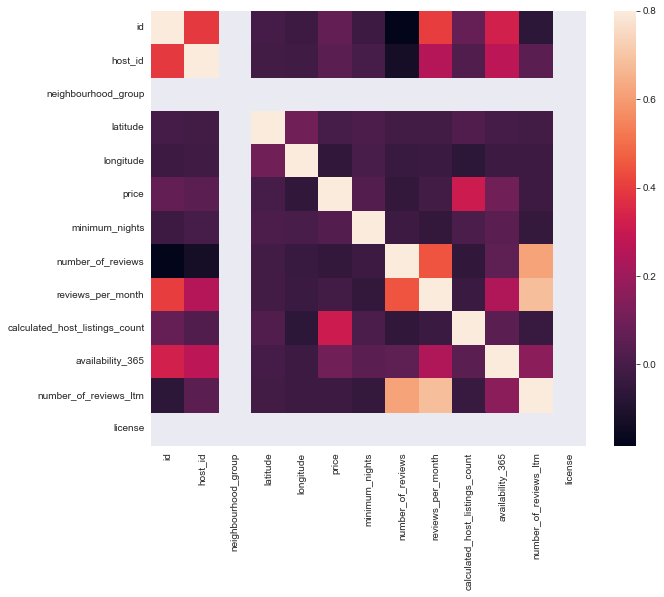

In [108]:
#correlation matrix
corrmat = london_airbnb.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=.8, square=True);

Here we can see the ccorrelation heatmap matrix, it i a graphical depiction of the coefficients of correlation between two variables in a dataset. By using it we can visualise the strength and direction of correlations between variables. The correlation values are shown in the heatmap matrix using color-coded cells, with the colour intensity or shading representing the magnitude of the correlation coefficient. Empty rows mean empty data. 
 
As we can see from the matrix, a lot of variables are not correlated between each other. This can help us in pre-processing the data and visualisations.

## <u>Step 2:</u> Data Cleaning and Pre-processing

### 1. Removing unnecessary columns

In [109]:
london_airbnb.isnull().sum()

id                                    0
name                                 21
host_id                               0
host_name                             5
neighbourhood_group               69351
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       16780
reviews_per_month                 16780
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           69351
dtype: int64

The **neighbourhood_group** column is supposed to be used to group listings by larger geographic areas within London, such as boroughs or districts. For current dataset this column is empty for all listings in the dataset, it could mean that the host did not provide this information. 

I took a look at the same Airbnb dataset for New York, and interestingly, the corresponding column is filled there. It got me thinking about neighborhood groups in London and how they might differ from those in New York City. From what I gather, London may have neighborhood groups, but they may not be as common or organized as in New York. I believe this could be due to various factors, such as differences in history and culture between the two cities. Neighborhood groups in New York City have a rich history dating back to the late 19th and early 20th centuries, driven by causes like immigration, labor movements, and social activities. It's fascinating how local dynamics can shape the development of neighborhood groups in different cities. London, on the other hand, has a distinct historical and cultural environment that may have affected how neighbourhood groups are being perceived, and that might be the reason why the **neighbourhood_group** column is empty. Based on these factors, we can get rid of the column altogether. <p>The **license** column is empty for all listing in the dataset and it doesn't bring any value to the analysis either, so I decided to drop it too.

In [110]:
london_airbnb = london_airbnb.drop(['neighbourhood_group', 'license'], axis=1)

### 2. Handling missing values

In [111]:
london_airbnb.isnull().sum()

id                                    0
name                                 21
host_id                               0
host_name                             5
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       16780
reviews_per_month                 16780
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
dtype: int64

 - **name** column has 21 missing values;
 - **host_name** has 5 missing values;
 - **last_review** and **reviews_per_month** both have 16780 missing values.  
### How to handle this missing values?
    
1. ***last_review*** and ***reviews_per_month***: with 16,780 missing data points, it's possible that the missing values imply that guests did not leave any reviews. In this situation, it would be a good idea to replace these missing values with "0" to reflect that no reviews have been submitted for those listings.

2. ***name*** and ***host_name***: with 21 and 5 missing data points accordingly we might use typical imputation approaches. We may replace the missing "name" values with the dataset's mode (most frequent) name. <p>There is no need to use a more complex approach here, such as text mining algorithms, to guess the missing names based on other available data. The choice of whether to fill in missing values with the mean or mode depends on the type of data and the nature of the missingness. Which one should we choose for these two columns?
* Mean: usually is used to fill in missing values for continuous variables that are normally distributed. Mean is a good choice when the distribution of the data is symmetrical and there are no significant outliers.
* Mode: usually is used to fill in missing values for categorical variables or discrete variables with a small number of possible values. Mode is a good choice when the variable is not normally distributed or when there are significant outliers.
* Median: usually is used to fill in missing values for continuous variables that are skewed or have significant outliers. Median is more robust to outliers than the mean.

In our case both **name** and **host_name** columns contain categorical data, such as names or text, so I decided to use **mode** as it replaces missing values with the most frequent ones in that column and may be a more appropriate choice for imputation in this case.
 

In [112]:
london_airbnb[['last_review','reviews_per_month']] = london_airbnb[['last_review','reviews_per_month']].fillna(0)

In [113]:
name_mode = london_airbnb['name'].mode()[0]
london_airbnb['name'].fillna(name_mode, inplace=True)

host_name_mode = london_airbnb['host_name'].mode()[0]
london_airbnb['host_name'].fillna(host_name_mode, inplace=True)

As you can see down below, we successfully handled missing values. 

In [114]:
london_airbnb.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

### 3. Checking for the duplicates

In [115]:
duplicates = london_airbnb.duplicated()
print(duplicates.sum())

0


In [116]:
london_airbnb[duplicates]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


There are no duplicates present, so we can move straight to the next step.

### 4. Encoding categorical variables

Some of the columns are not in an analysis-ready format. ***The room_type, neighbourhood, host_name, name, last_review*** columns, for example, are saved as strings.
* Let's firstly transform type of data for last_review from object to datetime:

In [117]:
london_airbnb['last_review'] = pd.to_datetime(london_airbnb['last_review'])

The following are some commonly used ways for encoding categorical variables:
* **Label Encoding:** Label encoding gives each category in the categorical feature a distinct number label. For example, for category feature named "neighbourhood" with categories like "Chelsea", "Kensington", and "Westminster", we may encode these as 0, 1, and 2, respectively.
* **One-Hot Encoding:** For each category in the categorical feature, one-hot encoding generates binary (0/1) columns. For example, for a categorical feature named "room_type" with categories like "Entire home/apt", "Private room", and "Shared room", we may construct three binary columns, one for each category, with values 0 or 1 to indicate if that category is present or not.
* **Binary Encoding:** Binary encoding is a type of one-hot encoding in which each category is represented as a binary string. When dealing with high cardinality categorical characteristics, this technique comes in handy. 

In our case, the categories **neighbourhood** and **room_type** have a natural ordinal relationship (for example, "room_type" has categories like "Entire home/apt", "Private room", and "Shared room" in a clear order), so we should consider using ***Label encoding*** to represent the ordinal relationship in the data.

In [118]:
label_encoder = LabelEncoder()
#london_airbnb['neighbourhood'] = label_encoder.fit_transform(london_airbnb['neighbourhood'])
#london_airbnb['room_type'] = label_encoder.fit_transform(london_airbnb['room_type'])


We decided not to encode some categorical variables because we want to use them in their original text format for future visualizations like word clouds and neighborhood names. In certain data visualization tasks, categorical variables can be used directly without encoding, such as constructing word clouds, to visually represent the frequency or distribution of categories. Word clouds are meant to provide visual insights and can be used to investigate and share information about categorical variables in their original form. Visual techniques like word clouds can be used to study and interpret data, and categorical variables can be directly utilized for visualization purposes.

Encoding categorical variables is often done in the context of preprocessing for machine learning or quantitative analysis activities to turn them into numerical representations that may be processed by machine learning algorithms or utilised for quantitative analysis. Many machine learning methods require numerical input, and encoding categorical variables is one method of converting non-numeric data into a format that these algorithms can use. *Due to the nature of the task, we are not going to use machine learning techniques, and therefore we can leave categorical values be.*




### 5. Scaling numerical values

The need for numerical variable scaling in the preprocessing stage is determined by the unique needs and aims of the exploratory study. 

* Data Distribution: If the scales or units of numerical variables are considerably varied, scaling can assist bring them to a comparable scale, making it easier to compare and analyse the data. 
For example, in our Airbnb dataset, variables such as **price** and **number of bedrooms** may have distinct scales, with **price** in the hundreds or thousands and **number of bedrooms** in the single digits. Scaling can help to normalise variables.
* Analysis Techniques: scaling is significant if the exploratory research includes quantitative approaches that are sensitive to variable scale, such as correlation analysis, clustering, or dimensionality reduction. Differences in numerical variable scales may impact these procedures, and scaling can assist reduce these concerns and yield more trustworthy findings.

On the other hand, scaling may not be essential if the exploratory research is primarily focused on qualitative or descriptive analysis and we are not employing quantitative approaches sensitive to the scale of variables. Therefore, I decided to leave the variables out of the scaling process and comment the code, in case I will change my mind later on.






In [119]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# data[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']] = scaler.fit_transform(data[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']])


In [120]:
london_airbnb

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,106332,"Lovely large room, Bethnal Green",264345,Susie,Tower Hamlets,51.52874,-0.05396,Private room,55,3,65,2016-06-10,0.47,1,74,0
1,13913,Holiday London DB Room Let-on going,54730,Alina,Islington,51.56861,-0.11270,Private room,50,1,30,2022-07-15,0.20,2,343,9
2,284532,COSY STUDIO-FLAT WITH A GREAT VIEW,1481412,Luca,Tower Hamlets,51.52851,-0.07426,Entire home/apt,90,5,42,2022-01-04,0.34,1,222,1
3,107048,A Luxury Studio Suite in Clerkenwell,259088,Simon,Islington,51.52478,-0.10484,Private room,180,4,493,2022-09-02,3.59,5,236,20
4,284603,Notting Hill church stay in Heaven!,1481851,Tania,Kensington and Chelsea,51.51464,-0.20004,Entire home/apt,297,14,6,2022-07-04,0.05,1,180,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69346,9671724,"Cozy room in Greenwich, river view",49977905,Kurt,Greenwich,51.48300,-0.01346,Private room,55,5,67,2021-10-03,0.84,3,0,1
69347,20277958,River view Tate Modern,1132775,Mark,Southwark,51.50914,-0.10192,Entire home/apt,201,3,61,2022-09-09,0.99,1,0,12
69348,20512703,"Luxury 4 bed house, 100m to river and palace",1706966,Asher & Aileen,Richmond upon Thames,51.40571,-0.35325,Entire home/apt,246,3,6,2022-08-31,1.49,1,4,6
69349,49698549,Waterfront Hampton Stay,34213667,Alan,Richmond upon Thames,51.41029,-0.35975,Entire home/apt,250,3,9,2022-07-18,0.61,1,2,4


## <u>Step 4:</u> Data Visualisations

In this part I want to focus on  **budget travel**, as it is the main fundamental principle of Airbnb service. As Airbnb originally started as a platform for affordable travel housing, it's important to explore the best accommodation options for budget-conscious travelers and break the stereotype that traveling is only for rich people. By exploring this, we can shed light on how Airbnb fulfills its mission of providing cost-effective accommodation solutions for travelers around the world.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

* Exploring the neighborhoods

### Visualisation #1: Bar chart of the average price for each neighborhood

The bar chart showing the average prices for each neighborhood in the London Airbnb dataset can be really helpful for travelers on a budget. It lets them easily compare the prices in different neighborhoods, so they can see which areas are more affordable or expensive and make a smart choice while booking a place to stay. Moreover, it helps travelers to  uncover hidden gems - neighborhoods that may not be as popular among tourists but have lower average prices. This makes it easy to find unique and authentic experiences in less-known regions that won't break the bank.

The chart also shows us the price variations among neighborhoods, and we can see the diversity of pricing in different parts of London. This can help tourists make informed decisions based on budget and preferences, and plan the trip accordingly.

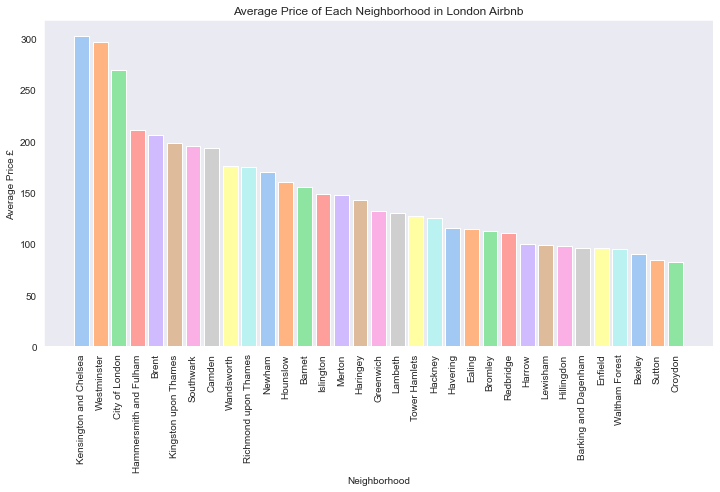

In [121]:
avg_price_by_neighborhood = london_airbnb.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(12, 6))  

sns.set_style("dark")
colors = sns.color_palette('pastel', n_colors=len(avg_price_by_neighborhood))

ax.bar(avg_price_by_neighborhood.index, avg_price_by_neighborhood.values, color = colors)  # plot the bars

ax.set_xlabel('Neighborhood')  
ax.set_ylabel('Average Price £')  
ax.set_title('Average Price of Each Neighborhood in London Airbnb') 
ax.tick_params(axis='x', rotation=90)
plt.show()

### What questions does this visualisation answer?
1. What are the top 5 most affordable neighborhoods to stay in?
2. What are the top 5 most expensive neighborhoods to stay in?
3. How does Airbnb cater to budget-conscious travelers?
4. How does Airbnb aim to break the stereotype that traveling is only for affluent individuals?

According to the bar chart, *Croydon, Sutton, Bexley, Waltham Forest, and Enfield* are the **top five most inexpensive neighbourhoods** to live in. These neighbourhoods may provide opportunity for budget-conscious travellers to locate cost-effective lodging alternatives on Airbnb, making them perfect selections for people wishing to travel on a budget.

*Kensington and Chelsea, Westminster, City of London, Hammersmith and Fulham, and Brent* on the other hand, are among **the top five most expensive neighbourhoods** to live in. While some places may be more expensive for travellers, Airbnb may still provide more reasonable lodging options than traditional hotels in these areas, giving budget travellers with more affordable alternatives.

As we can notice from the bar chart, Airbnb tries to cater the listing to the customers on a lower side of budget. 70% of the listings cost less than 150£ per night, which is an affordable price for a whole place. Only a few neighbourhoods are on a more expensive side with spikes on the left side, while the right part of the bar chart remains on approximately same level, this highlights the difference between neighborhoods. It demonstrates Airbnb's dedication to offering travellers with cost-effective housing options. It is consistent with their objective to make travel more accessible and inclusive, as well as to dispel the myth that travel is solely for the rich. Airbnb is smashing preconceptions and making travel more affordable for everyone by providing low-cost lodging in various neighbourhoods throughout the world.

### Visualisation #2: Plotting an interactive map of London

Our dataset has two intresting columns: latitude and longitude. Latitude and longitude are geographical coordinates that represent the location of each Airbnb listing on the Earth's surface. By using these columns, we can showcase the location of Airbnb listings in the form of an interactive map. To visualize the location of these Airbnb listings on a map, we are using a Python library called Folium, which provides an easy way to create interactive maps using data. The user can get a detailed overview of how the Airbnb listings are being distributed in London, and zoom in on specific neighborhoods of interest. It is a better version of a regular map with all listings interactively added to the map. It may be used for a variety of reasons, including finding popular neighbourhoods, analysing neighbourhood price or demand patterns, and comprehending the geographical dynamics of the Airbnb market in London.


In [122]:
import folium
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster

Long=-0.11
Lat=51.50
locations = list(zip(london_airbnb.latitude, london_airbnb.longitude))

map_london = folium.Map(location=[Lat,Long], zoom_start=10)
FastMarkerCluster(data=locations).add_to(map_london)
map_london


### What questions does this visualisation answer?
1. What geospatial insights can be drawn from London Airbnb?
2. How can user see precise location of Airbnb listings, compare the distance and interactively explore it?
3. How can hosts identify competitive areas or gaps in the market?
4. How can user idenify suitable listings based on proximity to specific locations or spots?
5. How can listings be used in urban planning and city development?
6. How can the map be used in business meetings?


By putting listings on an interactive map, we can gain valuable information and get some geospatial insights. By visualizing Airbnb listings on a map, we can gain insights into their geographical distribution. This can help us identify popular neighborhoods or areas with a high concentration of listings. It can also reveal patterns or trends in terms of the spatial distribution of listings, such as proximity to landmarks, amenities, or transportation hubs. Folium maps allow users to explore the map in details, to zoom in and out, to click on individual data points to access detailed information about each listing. This can help them better understand the how far away from each other different listings are, what is the distance between some spots on their bucket list and the accommodation and uncover hidden patterns or outliers in the data.

Hosts can use the map to identify competitive areas or gaps in the market, which will help them curate their own listing to the current market trends, or give them ideas/plans about investing in new property and broaden their business. Meanwhile travellers can use it to identify suitable locations for their stay based on proximity to their desired destinations. It makes the travel plan easy to follow and convenient. From a marketing point of view, that could be one of the main factors in making a decision towards one listing or another. This is especially true for travelers, as they mostly want to be surrounded by a lot of sightseeing spots. 

Urban planners, and real estate professionals can also benefit from the insights gained through spatial visualization to make informed decisions related to housing policies, urban development, and investment strategies. For people in business it enhances communication, as the folium maps provide an effective way to visually communicate findings and insights related to Airbnb data. Maps are often more intuitive and easily understandable than numerical data or charts, making them a powerful tool for presenting results to stakeholders or clients who may not have expertise in data analysis.

### Visualisation #3:  Airbnb listings distribution as a scatter plot

The reasoning behind this visualisation is the same as the previous one, but this time we are gonna plot a scatter plot, to visualise the amount of clusters and it's distribution throughout the London. We are using the lontitude and latitude columns for this, to cluster neighborhoods by it's coordinates on a map. It creates a colorful map, with clearly represented neighbourhoods. Scatter plots are easy to understand, and people are mosly visual learners by nature, and sometimes they just "get" concepts better when it is presented visually than when they're exposed to them in other ways. This visualisation is useful for our dataset because we can utilize two columns (lontitude and latitude) to showcase the neighborhoods density.

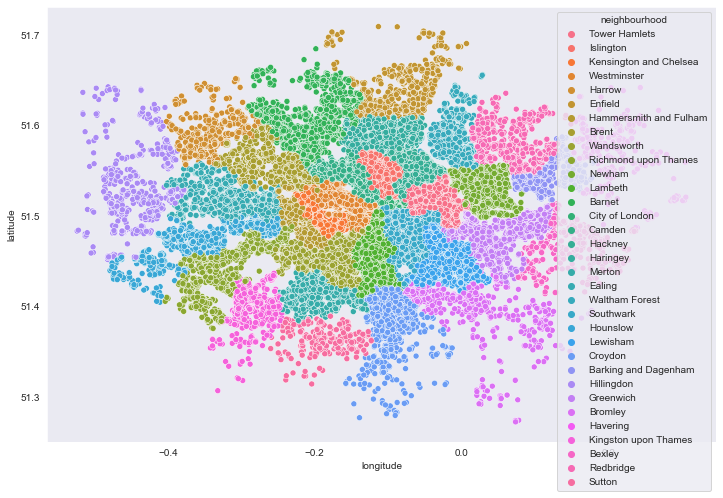

In [123]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=london_airbnb.longitude,y=london_airbnb.latitude,hue=london_airbnb.neighbourhood)
plt.show()

### What questions does this visualisation answer?
1. Where are the Airbnb listings located in London?
2. Which neighborhoods or areas have a high concentration of Airbnb listings?
3. Which neighborhoods or areas have a lower density of Airbnb listings? 
4. How can a host identify market opportunities and plan location-based strategies?
5. How can a traveller identify busy neighborhoods?

From the map it is clearly visible how neighborhoods are being distributed in London. If a user is looking for locations concentration, he should pay attention to areas with fewer points or sparse clusters on the scatter plot for lower density, and areas with more points for high concentration.  Host can benefit from scatterplot in terms of marketing strategy: the lower the density in the neighbourhood is, less competition, and vica versa. They also may discover locations where demand for Airbnb rentals is particularly strong compared to the quantity of available listings, and design location-based tactics to target such areas for their listings. From travellers perspective, users can identify busy neighborhoods by looking at clusters and update their travel decisions accordinly. 


### Visualisation #4: Violin plot of prices 

Current violinplot showcases the density and distribution of prices for the 5 cheapest neighbourhoods. We decided to visualise the cheapest locations, in order to target the budget travellers audience. Moreover, showing all neighbourhoods in violinplot is not effective, because the shape of the visualisation is too wide, therefore if the categorical data has too many variables, it would become unreadable. Violin plot demonstrates the distribution of quantitative data in the price column across categorical values in our neighbourhood column, in a way they can be compared. The violinplot is excellent for our London Airbnb dataset because it graphically depicts price multimodality, density, distribution, and summary statistics, offering insights into pricing patterns and trends in an entertaining and informative way.

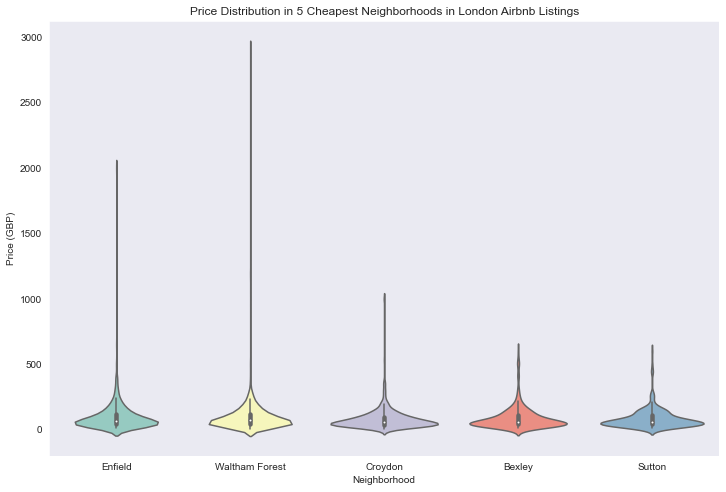

In [124]:
# Group the data by neighborhood and calculate the mean price
neighborhood_prices = london_airbnb.groupby('neighbourhood')['price'].mean().sort_values()

# Select the 5 cheapest neighborhoods
cheapest_neighborhoods = neighborhood_prices.head(5).index

# Filter the data for the 5 cheapest neighborhoods
df_cheapest_neighborhoods = london_airbnb[london_airbnb['neighbourhood'].isin(cheapest_neighborhoods)]

# Create a violin plot of price distribution for the 5 cheapest neighborhoods
plt.figure(figsize=(12, 8))
sns.violinplot(x='neighbourhood', y='price', data=df_cheapest_neighborhoods, palette='Set3')
plt.title('Price Distribution in 5 Cheapest Neighborhoods in London Airbnb Listings')
plt.xlabel('Neighborhood')
plt.ylabel('Price (GBP)')
plt.show()

### What questions does this visualisation answer?
1. How is the price distributed in cheap neighbourhoods? 
2. Are there distinct clusters or peaks in the price distribution, indicating different pricing tiers or categories?
3. Where are the regions of high demand or concentration of prices, and where are prices less dense?
4. Is the price distribution skewed towards higher or lower prices, or is it symmetrically distributed?
5. Are there any outliers or unusual patterns in the price distribution?

With violin plot we can compare interquartile range, median, which can help in evaluation. All five of the cheapest neighbourhoods have a similar price distribution. Each curve's width correlates to the estimated frequency of data points in each location, therefore the most listings prices for each of the cheapest neighbourhood lie between 0 and 100 GBP. The neighbourhood with biggest amount of data points with price between 0 and 100 GBP is Croydon, and the opposite with the least amount is Sutton.

We can easily spot ourliers on this violin plot. The neighbourhoods with long black vertical lines showcase the ouliers, as they strongly deviate from the rest of the price range. This means that a few nighbourhoods have values, that differ from the rest of the range. For example, in Waltham Forest the price of some airbnb goes up to 1200 GBP, same goes for Croydon with more than 1000 GBP. This might indicate a luxury resort, as the price differ a lot from the median. In comparison to it, the cheapest place in Enfield will be 550 GBP. Overall, the price distribution skewed is symmetrically distributed, with the exception of a few outliers, which can be eliminated in the future for more smoother results.

### Visualisation #5: Price Heatmap  

After doing the previoius visualisation we decided to put a constraint on price, in order to avoid the outliers for the visualisation purpuses. Here we are using longitude and latitude columns to visualise London map, as we did in visualisation #3, it might look similar to visualisation #3, but this one is a heatmap, rather than a regular scatterplot. It is a graphical representation of the concentration of Airbnb listings and their  pricing across different geographic regions in London.

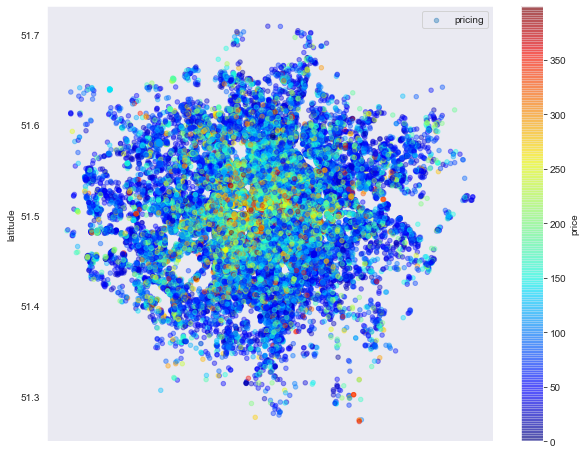

In [125]:
cheap = london_airbnb[london_airbnb.price < 400]

heatmap_price = cheap.plot(kind='scatter', x='longitude', y='latitude', label='pricing', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
heatmap_price.legend()

### What questions does this visualisation answer?
1. Are there any spatial patterns in London Airbnb prices? The heatmap can indicate geographical patterns such as clusters of high or low prices, allowing users to locate places with similar pricing features and comprehend the distribution of Airbnb prices around London.
+ same questions as previous visualisations

### Visualisation #6: Reviews heatmap by location

In this visualisation we decided to explore the number of reviews column and visualise it in form of the location on a map using latitude and longitude columns. To visualize the location of these Airbnb listings on a map, we are using a Python library called Folium, which provides an easy way to create interactive maps using data. It can help in determining which places have a larger concentration of reviews and which areas have less reviews. Uer can see the gradient color on the map, which makes it easier to find locations with a big number of reviews and where it is concentrated. Users can also zoom in on different neighbourhoods to explore them in detail.

In [126]:
from folium.plugins import HeatMap
map2=folium.Map([51.50,0.11],zoom_start=9.8)
location = ['latitude','longitude']
review_50 = london_airbnb[london_airbnb['number_of_reviews']>=50]
df = review_50[location]
HeatMap(df.dropna(),radius=8,gradient={.4: 'blue', .65: 'lime', 1: 'red'}).add_to(map2)
map2

### What questions does this visualisation answer?
1. Which locations have relatively fewer reviews and are not that popular? 
2. Where are the locations with the highest concentration of reviews (the most popular ones)?
3. Are there any geographic patterns or trends in the distribution of reviews? 
4. How does the number of reviews vary across different locations? 
5. How can geographic insights from the reviews heatmap inform decision-making? 

On the map we may be able to identify places  with deeper colours or higher intensity gradients, suggesting a greater number of reviews. This can help user in identifying popular sites that receive a large amount of review, therefore are more trustworthy. This can serve as a protection from scammers. For example, users might check specific neghbourhoods that have a higher density of reviews, such as Clapham, Brixton, Isligton, Camden Town, Notting Hill (they have a vibrant green colour). 

### Visualisation #8: Word cloud for marketing purposes
In this visualisation we are exploring the names of the airbnb as a word cloud. A word cloud is a visual representation of data in which words of different sizes are shown based on their frequency or relevance. A word cloud might be built in the context of Airbnb listings in London by gathering the names of various Airbnb homes in London and showing them in a visual diagram where the size of each property name correlates to its frequency of occurrence in the dataset.

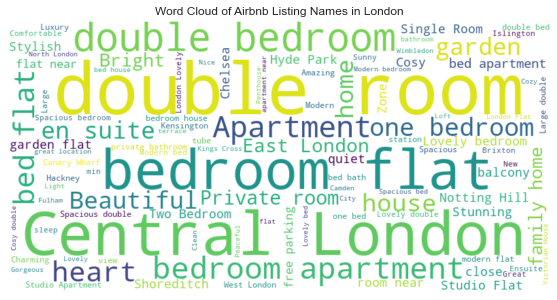

In [127]:
from wordcloud import WordCloud

# Extract the listing names from the dataset
listing_names = london_airbnb['name']

# Concatenate all listing names into a single string
all_names = ' '.join(listing_names)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(all_names)

# Create a plot of the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Airbnb Listing Names in London')
plt.show()

### What questions does this visualisation answer?
1. What users are most intrested in when choosing an Airbnb and what are their criterias?
2. How can hosts are utilizing this information in terms of marketing?
3. What are the most popular listings in London?
4. What is the diversity of Airbnb listings in different neighborhoods or areas of London? 

In this case word cloud is a useful tool for both users and hosts. Hosts try to name their Airbnb in the most catching way possible to use clickbait and increase their sales, while users are sorting Airbnb by their priorities right in Aribnb the search bar. It is an effective marketing strategy, that can be easily used to boost the Airbnb listing up. It is also an opportunity for hosts to showcase the unique features of their listings, helping them to stand out from the competition and attract potential guests. In word cloud the bigger the word is, the more frequently it appears in the dataset.

Looking at this visualisation we can specify a few popular features in listing. Main priorities are Central London, double bedroom, double room or bedroom flat. Some of the other popular ones include: beautiful, en suite, home, stylish, apartment, house, free parking, garden, Hyde Park, etc. All of them are very different, but in some way important for travellers. A few  intresting findings are: peaceful, victorian house, gorgeous, cozy couple, amazing, lovely, charming, stunning.


### Visualisation #9: Pie chart of most popular room types distribution 

A pie chart, often called a circle chart, is a circular diagram that looks like a pie. Each of the'slices' reflects a type of data that contributes to the overall picture. In total it comes to 100%, where each 'slice' is proportional to its fraction of the total. A pie chart gives a visual representation of the distribution of different room types in the dataset, allowing analysts to quickly understand  the relative proportions of each room type in the dataset. This might be handy for gaining a quick overview of the most popular room types among London Airbnb listings without digging into comprehensive numerical data.

In [128]:
import plotly.graph_objects as go
room_type_sum = london_airbnb['room_type'].value_counts()
fig = go.Figure(data=[go.Pie(labels=room_type_sum.index, values=room_type_sum, hole=.3)])
fig.show()

1. What are the most popular room types offered by Airbnb hosts in London?
2. How do the room types compare in terms of popularity?
3. Are there any room types that are particularly unpopular or underrepresented?
4. What are the proportions of different room types in the London Airbnb market?
5. How can hosts or investors cater to the demand for different room types in London?

After analyzing the pie chart for room types, we can see that the entire house/apartment takes the majority of the room types with 59,4%. The second big chunk of all listings are private rooms with 39,6%. Those two types of accommodation share the airbnb market equally, with less than 1% given to shared rooms and hotel rooms combined together. That makes shared rooms and hotel rooms unpopular accommodation offer. This information can also help hosts to invest smartly into the most profitable property, instead of wasting it on unpopular options.

### Visualisation #10: Relation between neighbourgroup and Availability of Room

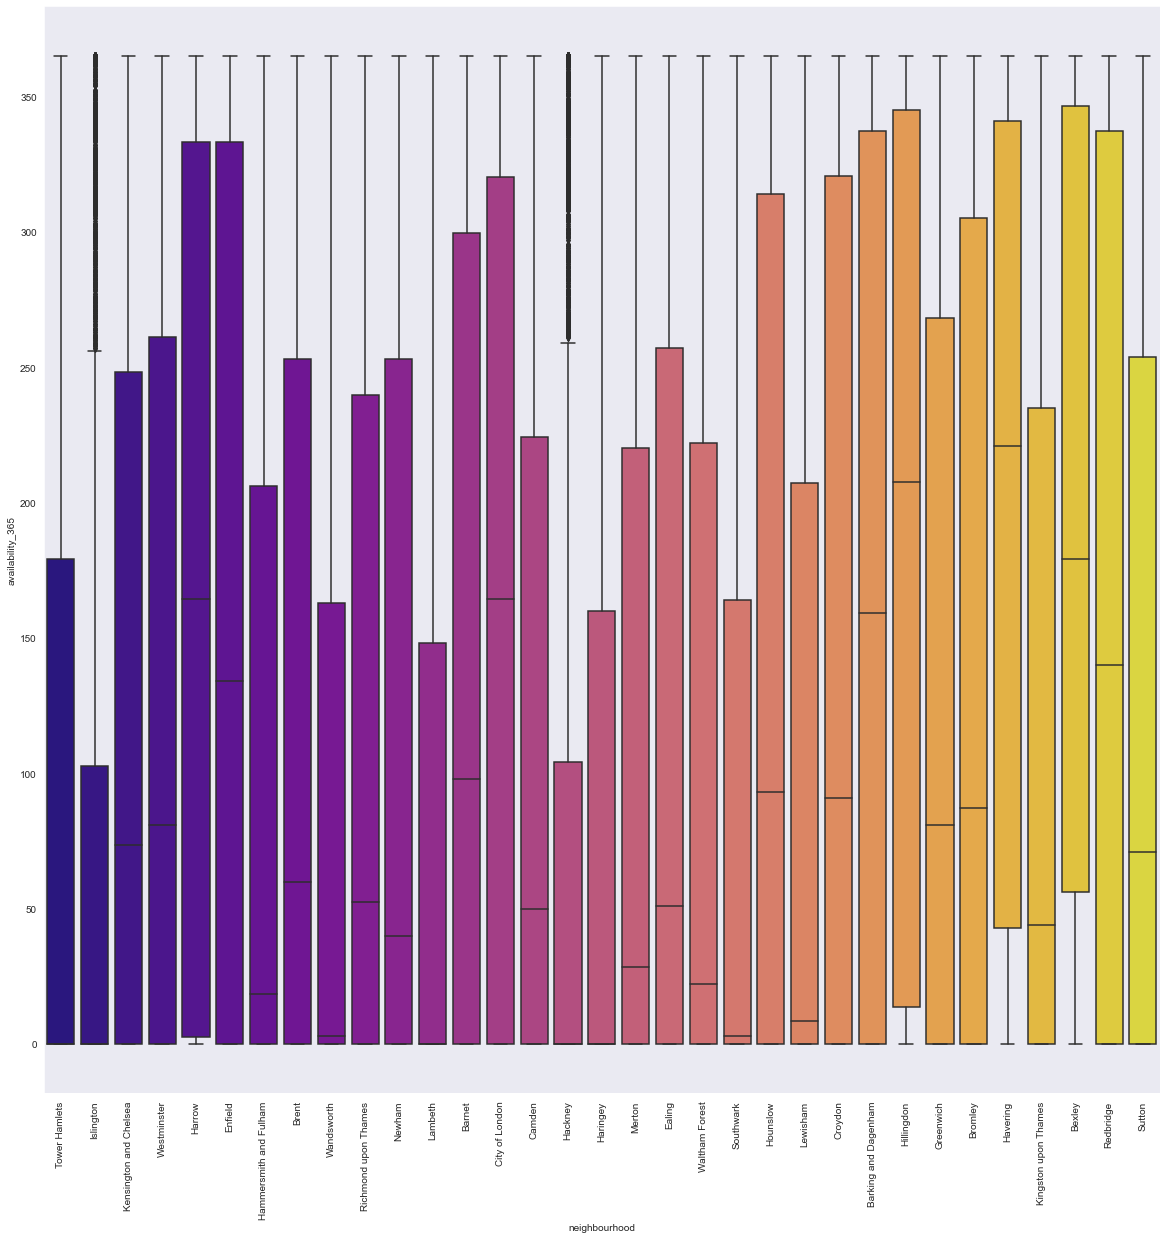

In [129]:
plt.figure(figsize=(20,20))
ax = sns.boxplot(data=london_airbnb, x='neighbourhood',y='availability_365',palette='plasma')
ax.tick_params(axis='x', rotation=90)
plt.show()

The visualisation that depicts the relationship between neighbour groups and room availability is useful to our dataset in various ways. The visualisation enables us to check if there are any specific neighbourhoods where availability of rooms is more or less prevalent than usual. This information is beneficial to both visitors and hosts. Visitors can use this information to select a neighbourhood category that is more likely to have available rooms, whilst hosts can use it to find regions where their listings may be in popular demand. It helps us in identifying any commonalities or trends in the availability of rooms across various neighbourhood groupings. 

We might be able to determine whether or not particular neighbourhood groups have seasonal fluctuations in room availability, or if there are additional variables that impact room availability within particular neighbourhood groups. The visualisation can aid us in detecting probable outliers or abnormalities in the dataset. If we see a neighbourhood group with much higher or lower room availability than the norm, we can look into it more to determine if there is any deeper reason for this tendency. It can also help with detecting seasonal trends.

### Visualisation #11: Heatmap of availabilty by room and neighbourhood

How does the availability change depending on room type and neighbourhood?

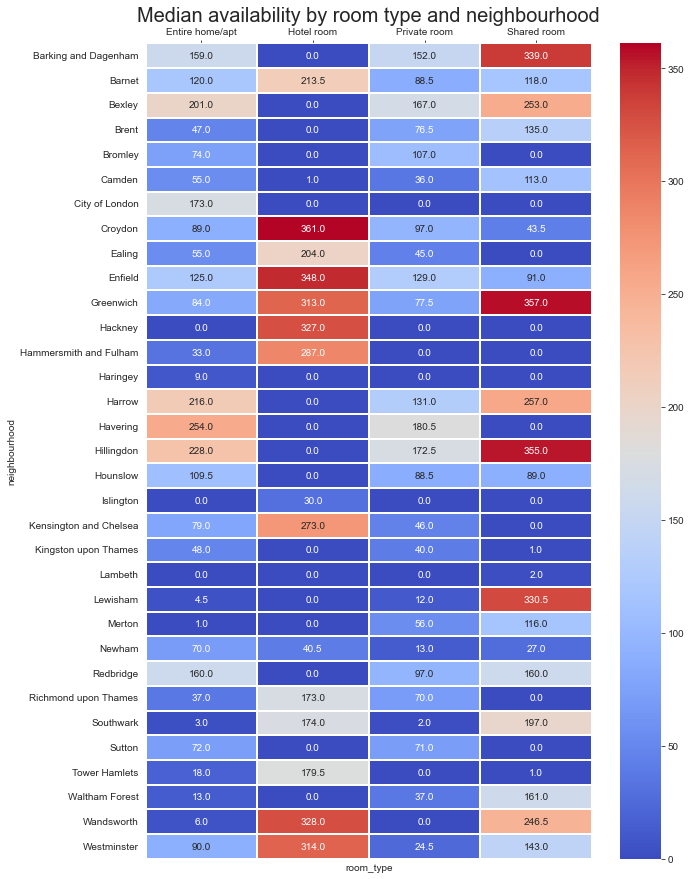

In [130]:
median_availabilty_by_room_and_neighbourhood = london_airbnb.pivot_table(
    index='neighbourhood',
    columns='room_type',
    values='availability_365',
    aggfunc='median',
    fill_value=0
)


fig, ax = plt.subplots(figsize=(10,15))
sns.heatmap(
    median_availabilty_by_room_and_neighbourhood, 
    annot=True,
    fmt='.1f', 
    linewidths=1,
    cmap='coolwarm'
)
ax.xaxis.tick_top()
plt.title('Median availability by room type and neighbourhood', fontsize = 20);

### Visualisation #12: Avaliability histplot and avaliability pie chart

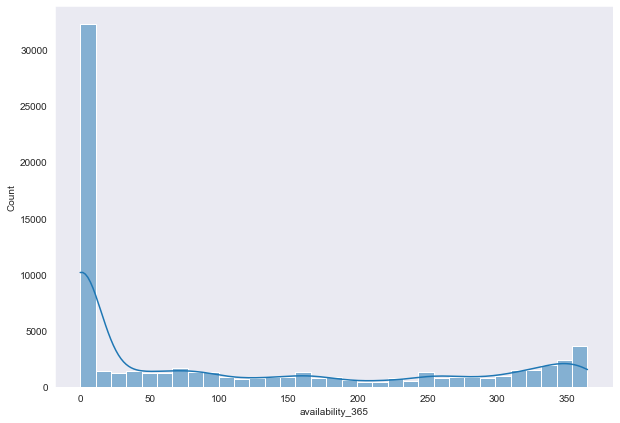

In [131]:
plt.figure(figsize=(10,7))
sns.histplot(data=london_airbnb, x='availability_365', kde=True)
plt.show()

In [132]:
london_airbnb['availability_clusters'] = np.where(london_airbnb['availability_365']<=90, '0-3 Months',
                   np.where((london_airbnb['availability_365'] > 9) & (london_airbnb['availability_365'] <= 180), '3-6 Months',
                   np.where((london_airbnb['availability_365'] > 180) & (london_airbnb['availability_365'] <= 270), '6-9 Months', '9-12 Months')))

london_airbnb['availability_clusters'].value_counts()

0-3 Months     42375
9-12 Months    13996
3-6 Months      7368
6-9 Months      5612
Name: availability_clusters, dtype: int64

In [133]:
aval_sum = london_airbnb['availability_clusters'].value_counts()
fig = go.Figure(data=[go.Pie(labels=aval_sum.index, values=aval_sum, pull=[0, 0, 0.2, 0])])
fig.show()

### Visualisation #13: Timeseries of last review over years

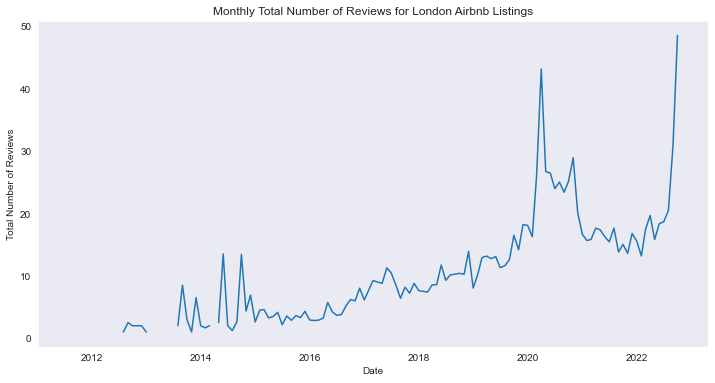

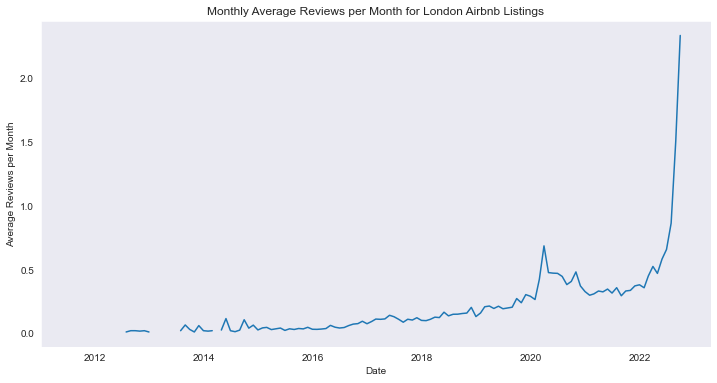

In [134]:
london_airbnb = london_airbnb[london_airbnb['last_review'].dt.year >= 2010]
london_airbnb.set_index('last_review', inplace=True)

df_monthly = london_airbnb.resample('M').mean()  # resample to monthly and calculate mean for 'reviews_per_month'

plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly['number_of_reviews'])
plt.title('Monthly Total Number of Reviews for London Airbnb Listings')
plt.xlabel('Date')
plt.ylabel('Total Number of Reviews')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly['reviews_per_month'])
plt.title('Monthly Average Reviews per Month for London Airbnb Listings')
plt.xlabel('Date')
plt.ylabel('Average Reviews per Month')
plt.show()

